In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
!pip install wordcloud

In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-02-11 23:58:13.460012: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-02-11 23:58:13.460048: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
import pandas
book=pd.read_csv("C:/Users/Akhil/Desktop/ASSIGNMENTS/apple.txt",error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [5]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [6]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [7]:
# Joining the list into one string/text
text = ' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [8]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [9]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [11]:
len(text_tokens)

3444

In [12]:
my_stop_words=pd.read_csv("C:/Users/Akhil/Desktop/ASSIGNMENTS/stoptext.txt",error_bad_lines=False)
my_stop_words.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [13]:

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become']


In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'finally', 'macbook', 'possession', 'got', 'it', 'in', '50k', 'in', 'diwali', 'sale', 'technically', 'good']


In [16]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'student', 'and', 'coder', 'final', 'macbook', 'possess', 'got', 'it', 'in', '50k', 'in', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'other', 'laptop', 'crash', 'and', 'becom']


In [17]:
!python -m spacy download en

2021-02-11 23:58:27.237797: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-02-11 23:58:27.237850: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Pleaseuse the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2021-02-11 23:58:35.519908: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-02-11 23:58:35.519971: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2021-02-11 23:58:42.846105: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-02-11 23:58:42.846150: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become


In [21]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'for', 'student', 'and', 'coder', 'finally', 'MacBook', 'possession', 'get', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'technically', 'good']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [23]:
print(vectorizer.vocabulary_)

{'its': 453, 'amazing': 71, 'battery': 124, 'last': 478, 'around': 98, '10': 0, '12': 6, 'hrsb': 412, 'laptop': 471, 'for': 345, 'student': 801, 'and': 77, 'coder': 191, 'finally': 337, 'macbook': 509, 'possession': 644, 'get': 368, 'it': 449, 'in': 425, '50k': 34, 'diwali': 262, 'sale': 719, 'technically': 817, 'good': 373, 'laptopgood': 474, 'newsluxury': 563, 'product': 663, 'niche': 565, 'technology': 818, 'life': 487, 'reliable': 696, 'machine': 511, 'other': 603, 'crash': 216, 'become': 129, 'defunct': 237, '610': 44, 'year': 932, 'no': 569, 'antivirus': 83, 'require': 704, 'security': 733, 'of': 582, 'datum': 228, 'transaction': 860, 'much': 553, 'well': 901, 'terrific': 823, 'sense': 739, 'pridebad': 654, 'news': 562, 'problems': 659, 'will': 913, 'be': 125, 'there': 830, 'if': 417, 'you': 935, 'switch': 810, 'from': 356, 'window': 914, 'base': 122, 'system': 811, 'very': 888, 'less': 484, 'space': 776, 'hard': 390, 'disk': 257, 'cd': 177, 'drive': 269, 'inability': 426, 'to': 

In [24]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['9th', 'able', 'about', 'above', 'accidental', 'accounting', 'act', 'adapt', 'add', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacte', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'an', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'any', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'appsnumber', 'april', 'arenot', 'around', 'as']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(X.toarray().shape)

(3423, 939)


In [26]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [27]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'air', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'around', 'as', 'at', 'battery', 'be', 'best', 'better', 'bought', 'but', 'buy', 'can', 'cost', 'display', 'even', 'external', 'fine', 'for', 'from', 'get', 'good', 'got', 'great', 'hard', 'have', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'issues', 'it', 'it is', 'its', 'just', 'keyboard', 'laptop', 'like', 'mac', 'macbook', 'macbook air', 'me', 'months', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'one', 'only', 'or', 'other', 'product', 'quality', 'sale', 'screen', 'service', 'service center', 'so', 'some', 'still', 'stopped', 'that', 'the', 'then', 'they', 'this', 'to', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'while', 'will', 'windows', 'with', 'working', 'would', 'year', 'years', 'you', 'you are']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '12', '2017', '4k', '50k', 'about', 'about the', 'above', 'after', 'after using', 'again', 'air', 'all', 'also', 'am', 'amazing', 'amazon', 'an', 'and', 'and after', 'and is', 'and it', 'and the', 'and then', 'any', 'apple', 'apple product', 'apple service', 'apple support', 'apps', 'apps which', 'apps which are', 'april', 'are', 'are really', 'are way', 'around', 'as', 'as it', 'asked', 'asked for', 'at', 'at all', 'at the', 'at the price', 'automatically', 'available', 'awesome', 'back', 'backup', 'bad', 'battery', 'battery life', 'be', 'be fine', 'be ignored', 'be it', 'be it the', 'be used', 'because', 'been', 'being', 'best', 'best laptop', 'best laptop for', 'better', 'better graphics', 'better than', 'bit', 'board', 'book', 'both', 'bought', 'bought it', 'bought it on', 'bought this', 'bought this macbook', 'box', 'build', 'but', 'but can', 'but can be', 'but if', 'but if you', 'butter', 'button', 'buy', 'buying', 'by', 'can', 'can be', 'can be ignored', 'can get', 'canno

In [29]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

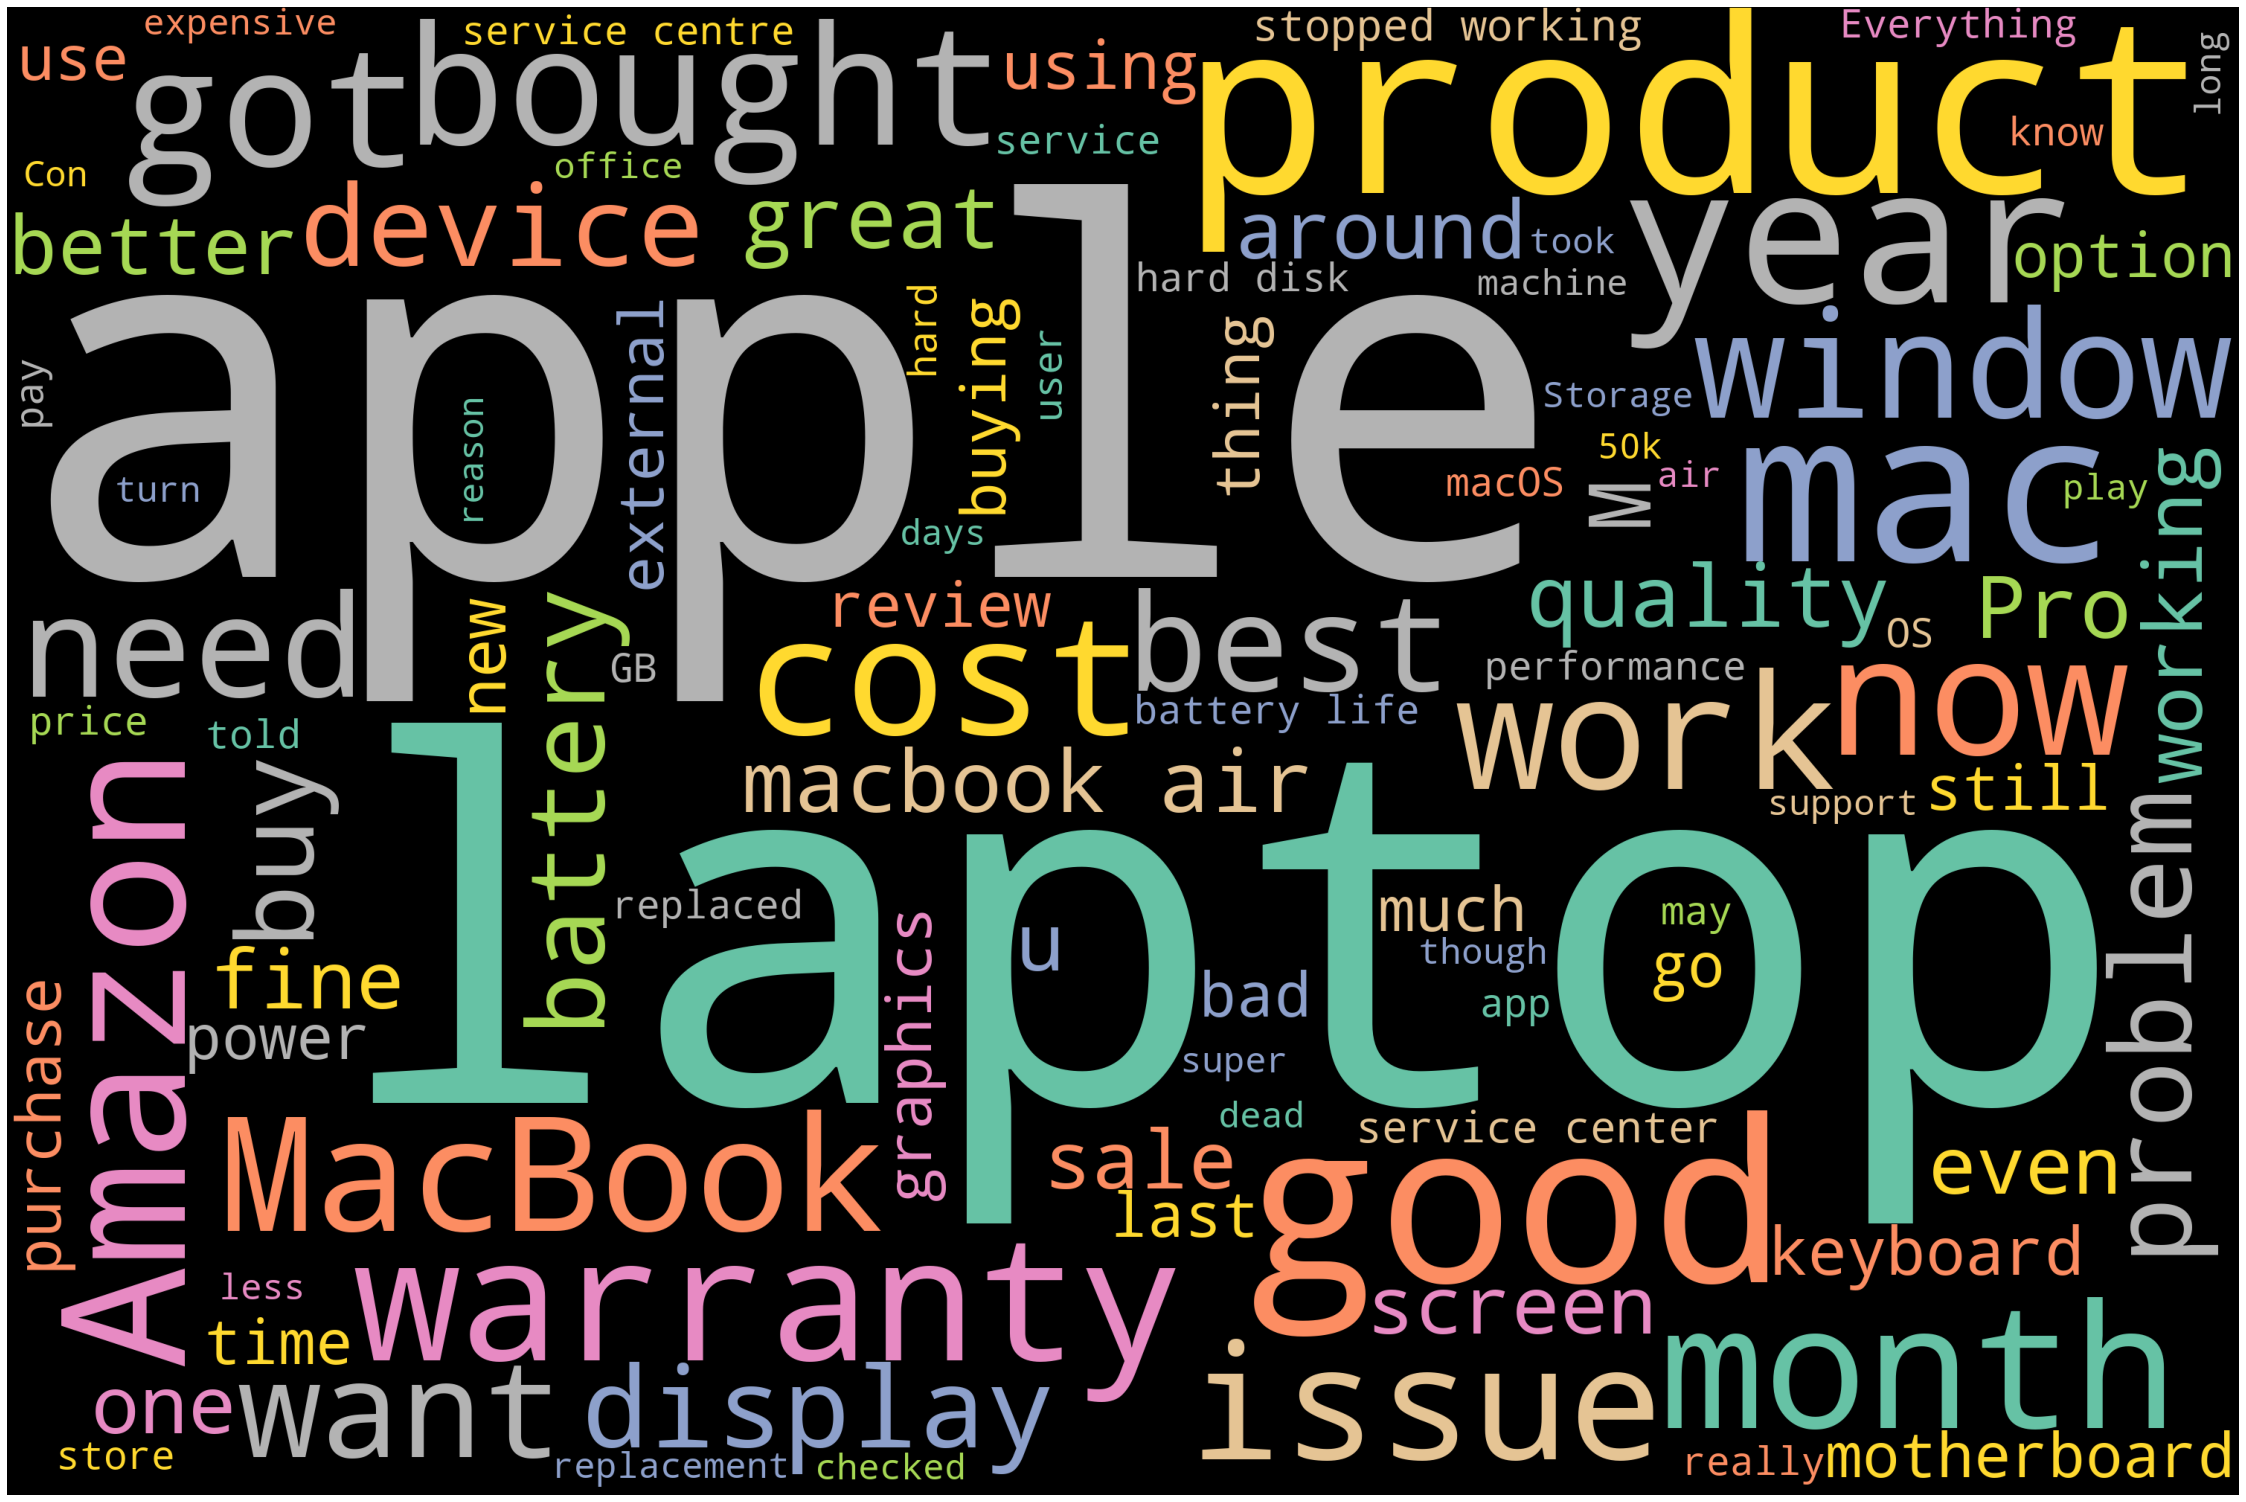

In [30]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [33]:
one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [34]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [35]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best PROPN
Laptop PROPN
under ADP
60k NUM
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [37]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['windows', 'term', 'love', 'battery', 'life', 'look', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'u', 'use', 'office']


In [38]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,office,3
1,are,3
2,want,2
3,battery,2
4,store,2
5,have,2
6,install,2
7,version,2
8,file,2
9,play,2


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

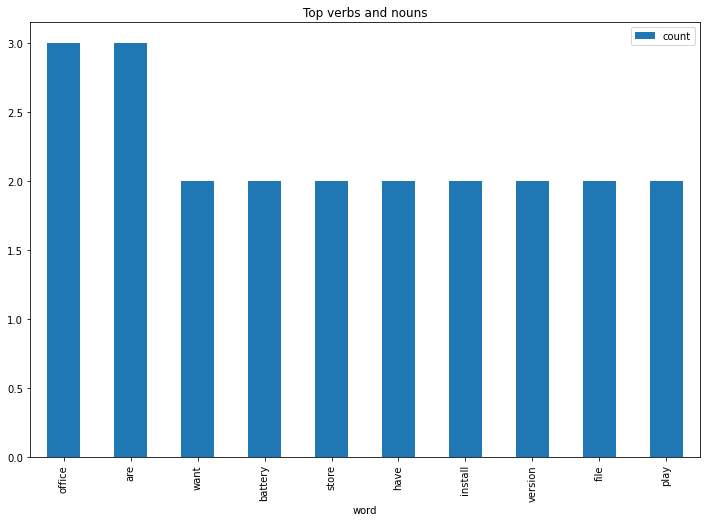

In [39]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [42]:
#Sentiment analysis
afinn = pd.read_csv("C:/Users/Akhil/Desktop/ASSIGNMENTS/Afinn.csv",sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [43]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [45]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [46]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [47]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [48]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [49]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [50]:
calculate_sentiment(text = 'amazing')

4

In [51]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [52]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [53]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
110,"The build is super strong, the operating syste...",5,10
142,Except for not so good sound quality while wat...,5,19
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [54]:
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.914439
std        3.347789
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [55]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [56]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

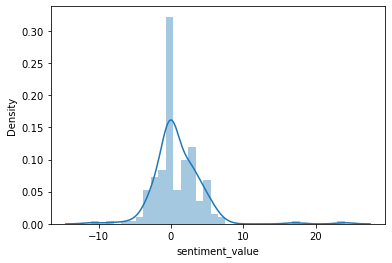

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

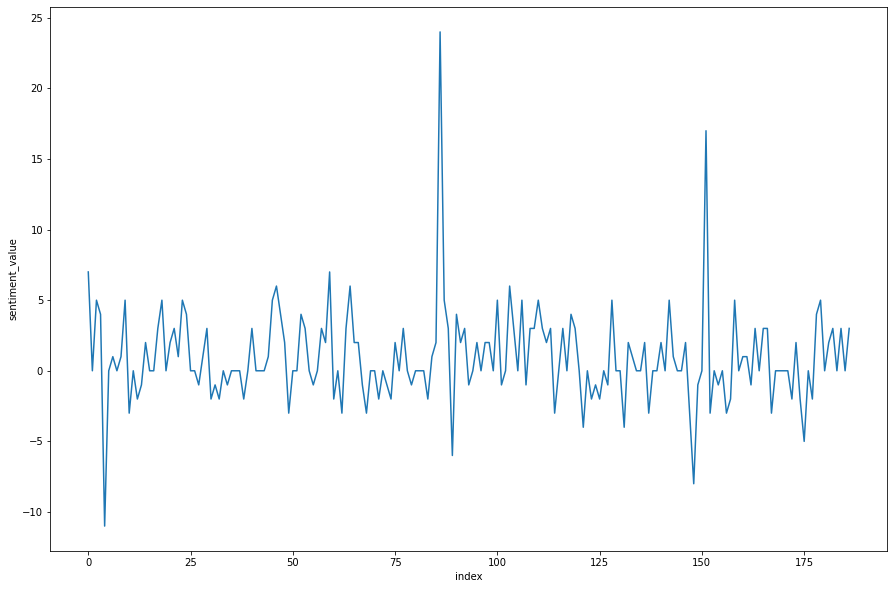

In [58]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

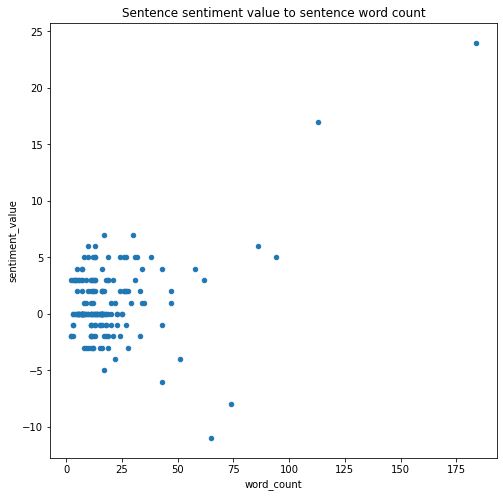

In [59]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')